## FLOWERS 

In [ ]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
folder = '/content/drive/MyDrive/Flower/flower/flower_train/'
x_train,y_train=list(),list()
for file in listdir(folder):
  if file.startswith('apricot '): 
    output=1
  if file.startswith('daisy '): 
    output=2
  if file.startswith('lotus '): 
    output=3  
  if file.startswith('rose '): 
    output=4
  if file.startswith('water lily '): 
    output=5
  photo=load_img(folder+file,target_size=(30,30))
  photo=img_to_array(photo)
  x_train.append(photo)
  y_train.append(output)
x_train = asarray(x_train) 
y_train = asarray(y_train)
y_train = to_categorical(y_train) 
print(x_train.shape,y_train.shape)
save('x_train.npy', x_train)
save('y_train.npy', y_train)

folder = '/content/drive/MyDrive/Flower/flower/flower_test/'
x_test, y_test = list(),list()
for file in listdir(folder):
  if file.startswith('apricot '): 
    output=1
  if file.startswith('daisy '): 
    output=2
  if file.startswith('lotus '): 
    output=3  
  if file.startswith('rose '): 
    output=4
  if file.startswith('water lily '): 
    output=5
  photo=load_img(folder+file,target_size=(30,30))
  photo=img_to_array(photo)
  x_test.append(photo)
  y_test.append(output)
x_test = asarray(x_test) 
y_test = asarray(y_test) 
y_test = to_categorical(y_test)
print(x_test.shape, y_test.shape)
save('x_test.npy', x_test)
save('y_test.npy', y_test)

x_train = x_train.reshape(1000, 30, 30, 3)
x_train= x_train.astype('float32')/255
print(x_train.shape)

x_test = x_test.reshape(50, 30, 30, 3)
x_test=  x_test.astype('float32')/255
print(x_test.shape)

# thuc hien cac tich chap
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(30,30,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.compile(loss = categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
train = model.fit(x_train, y_train, batch_size=148, epochs=88, verbose=1)
model.summary()

acc,loss  = model.evaluate(x_test,y_test)

model.save('flower.h5')


Input Flower: rose
1/1 [==============================] - 0s 181ms/step
Predicted label: rose
1/1 [==============================] - 0s 21ms/step
Predicted label: rose
1/1 [==============================] - 0s 21ms/step
Predicted label: rose
1/1 [==============================] - 0s 25ms/step
Predicted label: rose
1/1 [==============================] - 0s 22ms/step
Predicted label: rose
1/1 [==============================] - 0s 25ms/step
Predicted label: rose
1/1 [==============================] - 0s 22ms/step
Predicted label: rose
1/1 [==============================] - 0s 22ms/step
Predicted label: rose
1/1 [==============================] - 0s 21ms/step
Predicted label: rose


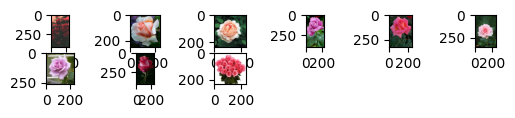

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
folder = '/content/drive/MyDrive/Flower/flower/flower_test/'
dict = {1:'apricot', 2:'daisy', 3:'lotus', 4:'rose', 5:'water lily'}

input_ = input("Input Flower: ")
for i in range(0,9):
  plt.subplot(10,6,i+1)
  filename = folder + input_ + ' (' + str(i+1) + ').jpg'
  img = imread(filename)
  plt.imshow(img)
  
  img = load_img(filename, target_size=(30, 30))
  img_arr = img_to_array(img)
  img_arr = img_arr.reshape((1,) + img_arr.shape)
  img_arr = img_arr.astype('float32')/255
 
  prediction = model.predict(img_arr)
  
  label = np.argmax(prediction)
  print('Predicted label:', dict[label])
plt.show()

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
img = load_img('/content/drive/MyDrive/Flower/flower/lotus(1).jpg/',target_size=(30,30))
plt.imshow(img)

import numpy as np
img = img_to_array(img)
img = img.reshape(1,30,30,3)
img = img.astype('float32')/255
np.argmax(model.predict(img),axis=-1)

# FOOD

In [ ]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array, to_categorical
folder = '/content/drive/MyDrive/Food/AI_dataset_10VNfoods/train_set/'
x_train,y_train=list(),list()
for file in listdir(folder):
  if file.startswith('banhchung '): 
    output=1
  if file.startswith('banhmi '): 
    output=2
  if file.startswith('bunbohue '): 
    output=3  
  if file.startswith('comtam '): 
    output=4
  if file.startswith('bunthitnuong '): 
    output=5
  if file.startswith('chedauden '): 
    output=6
  if file.startswith('banhtrungthu '): 
    output=7
  if file.startswith('banhxeo '): 
    output=8
  if file.startswith('xoigac '): 
    output=9
  if file.startswith('cafesua '): 
    output=10
  photo=load_img(folder + file, target_size=(30,30))
  photo=img_to_array(photo)
  x_train.append(photo)
  y_train.append(output)
x_train=asarray(x_train) 
y_train=asarray(y_train)
y_train =to_categorical(y_train) 
print(x_train.shape,y_train.shape)
save('x_train.npy',x_train)
save('y_train.npy',y_train)

folder = '/content/drive/MyDrive/Food/AI_dataset_10VNfoods/test_set'
x_test, y_test = list(),list()
for file in listdir(folder):
  if file.startswith('banhmi'): 
    output=1
  if file.startswith('banhxeo'): 
    output=2
  if file.startswith('bunbohue'): 
    output=3  
  if file.startswith('comtam'): 
    output=4
  if file.startswith('bunthitnuong'): 
    output=5
  if file.startswith('chedauden'): 
    output=6
  if file.startswith('banhtrungthu'): 
    output=7
  if file.startswith('banhchung'): 
    output=8
  if file.startswith('xoigac'): 
    output=9
  if file.startswith('cafesua'): 
    output=10
  photo=load_img(folder+file,target_size=(30,30))
  photo=img_to_array(photo)
  x_test.append(photo)
  y_test.append(output)
x_test=asarray(x_test) 
y_test=asarray(y_test) 
y_test =to_categorical(y_test)
print(x_test.shape,y_test.shape)
save('x_test.npy',x_test)
save('y_test.npy',y_test)

x_train = x_train.reshape(1400, 30, 30, 3)
x_train= x_train.astype('float32')/255
print(x_train.shape)

x_test = x_test.reshape(100, 30, 30, 3)
x_test=  x_test.astype('float32')/255
print(x_test.shape)

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, LeakyReLU
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(30,30,3), padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))

from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
model.compile(loss = categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
train = model.fit(x_train, y_train, batch_size=148, epochs=88, verbose=1)
model.summary()

acc,loss  = model.evaluate(x_test,y_test)

model.save('Foods.h5')

# Face


In [ ]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

folder = '/content/drive/MyDrive/Person/Face/train_set/'
x_train,y_train=list(),list()
for file in listdir(folder):
  output=0.0
  if file.startswith('Mphuc '): 
    output=1
  if file.startswith('PhatPhat '): 
    output=2
  if file.startswith('Danh '): 
    output=3  
  if file.startswith('Luan '): 
    output=4
  if file.startswith('Khang '): 
    output=5
  if file.startswith('Khang '): 
    output=6
  if file.startswith('datdat '): 
    output=7
  if file.startswith('CuongCuong '): 
    output=8
  if file.startswith('TanTan '): 
    output=9
  if file.startswith('QuocDung '): 
    output=10
  if file.startswith('Phuc '): 
    output=11
  if file.startswith('Thuan '): 
    output=12
  if file.startswith('VietDung '): 
    output=13
  photo=load_img(folder+file,target_size=(32,32))
  photo=img_to_array(photo)
  x_train.append(photo)
  y_train.append(output)
x_train=asarray(x_train) 
y_train=asarray(y_train)
y_train =to_categorical(y_train) 
print(x_train.shape,y_train.shape)
save('x_train.npy',x_train)
save('y_train.npy',y_train)

folder = '/content/drive/MyDrive/Person/Face/test_set/'
x_test,y_test=list(),list()
for file in listdir(folder):
  output=0.0
  if file.startswith('Mphuc'): 
    output=1
  if file.startswith('Cuong '): 
    output=2
  if file.startswith('Danh '): 
    output=3  
  if file.startswith('dat '): 
    output=4
  if file.startswith('Dien '): 
    output=5
  if file.startswith('Khang '): 
    output=6
  if file.startswith('Luan '): 
    output=7
  if file.startswith('Phat '): 
    output=8
  if file.startswith('Phuc '): 
    output=9
  if file.startswith('QuocDung '): 
    output=10
  if file.startswith('Tan '): 
    output=11
  if file.startswith('Thuan '): 
    output=12
  if file.startswith('VietDung '): 
    output=13
  photo=load_img(folder+file,target_size=(32,32))
  photo=img_to_array(photo)
  x_test.append(photo)
  y_test.append(output)
x_test=asarray(x_test) 
y_test=asarray(y_test) 
y_test =to_categorical(y_test)
print(x_test.shape,y_test.shape)
save('x_test.npy',x_test)
save('y_test.npy',y_test)

x_train = x_train.reshape(650, 32, 32, 3)
x_train= x_train.astype('float32')/255
print(x_train.shape)

x_test = x_test.reshape(130, 32, 32, 3)
x_test=  x_test.astype('float32')/255
print(x_test.shape)

# thuc hien cac tich chap
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(30,30,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(14,activation='softmax'))

model.compile(loss = categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
train = model.fit(x_train, y_train, batch_size=148, epochs=88, verbose=1)
model.summary()

acc,loss  = model.evaluate(x_test,y_test)

model.save('faceface.h5')

# Money

In [ ]:
import numpy as np
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array, to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt
from keras.utils.image_utils import img_to_array

#load folder datasets
folder = '/content/drive/MyDrive/money/'
#tiến hành tiền xử lý dữ liệu
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('5000 '):
    output = 1.0
  if file.startswith('10000 '):
    output = 2.0
  if file.startswith('20000 '):
    output = 3.0
  if file.startswith('50000 '):
    output = 4.0
  if file.startswith('100000 '):
    output = 5.0
  if file.startswith('500000 '):
    output = 6.0

  img =load_img(folder+file,target_size=(100,200))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('tien_hinh_hoc.npy',photos)
save('tien_ten_hoc.npy',labels)

x_train = np.load('/content/tien_hinh_hoc.npy')
y_train = np.load('/content/tien_ten_hoc.npy')



In [ ]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
folder = '/content/drive/MyDrive/Money/money/train_set/'
x_train,y_train=list(),list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('5000 '): 
    output=1
  if file.startswith('10000 '): 
    output=2
  if file.startswith('50000 '): 
    output=3  
  if file.startswith('100000 '): 
    output=4
  if file.startswith('500000 '): 
    output=5
  photo=load_img(folder+file,target_size=(30,30))
  photo=img_to_array(photo)
  x_train.append(photo)
  y_train.append(output)
x_train = asarray(x_train) 
y_train = asarray(y_train)
y_train = to_categorical(y_train) 
print(x_train.shape,y_train.shape)
save('x_train.npy', x_train)
save('y_train.npy', y_train)

folder = '/content/drive/MyDrive/Money/money/test_set/'
x_test, y_test = list(),list()
for file in listdir(folder):
  if file.startswith('5000 '): 
    output=1
  if file.startswith('10000 '): 
    output=2
  if file.startswith('50000 '): 
    output=3  
  if file.startswith('100000 '): 
    output=4
  if file.startswith('500000 '): 
    output=5
  photo=load_img(folder+file,target_size=(40,40))
  photo=img_to_array(photo)
  x_test.append(photo)
  y_test.append(output)
x_test = asarray(x_test) 
y_test = asarray(y_test) 
y_test = to_categorical(y_test)
print(x_test.shape, y_test.shape)
save('x_test.npy', x_test)
save('y_test.npy', y_test)

x_train = x_train.reshape(500, 40, 40, 3)
x_train= x_train.astype('float32')/255
print(x_train.shape)

x_test = x_test.reshape(50, 40, 40, 3)
x_test=  x_test.astype('float32')/255
print(x_test.shape)

# thuc hien cac tich chap
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(30,30,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.compile(loss = categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
train = model.fit(x_train, y_train, batch_size=148, epochs=88, verbose=1)
model.summary()

acc,loss  = model.evaluate(x_test,y_test)

model.save('Tien.h5')

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
img = load_img('/content/drive/MyDrive/MOney/money/100000.jpg',target_size=(40,40))
plt.imshow(img)

import numpy as np
img = img_to_array(img)
img = img.reshape(1,40,40,3)
img = img.astype('float32')/255
np.argmax(model.predict(img),axis=-1)